In [1]:
import torch
import pickle
import matplotlib.pyplot as plt
import cv2
import glob

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

**Enter the path of the parent directory of Group_9 folder**

In [3]:
## CHANGE
PATH = r"./"
#PATH = r"/content/drive/My Drive/GPBPR"
#PATH = r"/content/drive/My Drive" ## parent directory of Group_6 folder

In [4]:
# with open( PATH + r'/Group_9/src/GPBPR2.py','r') as f:
#   fi = f.read()
# with open('GPBPR2.py','w') as f:
#   f.write(fi)

In [5]:
import BigPAIBPR 

loading top&bottom features


# Loading Saved Weights and the Model

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
textfeat=BigPAIBPR.textfeat

In [7]:
visfeat=BigPAIBPR.visfeat

In [8]:
model_state = torch.load(PATH + r'cp-59.pt',map_location=device)
BigPAIBPR.model.load_state_dict(model_state['model_state_dict'])
model = BigPAIBPR.model

# Creating a Test Set from ID Values
* u --> User ID
* t --> Top ID
* br --> Array of Bottom IDs
* sr --> Array of Shoes IDs


In [9]:
# model.eval()

In [10]:
#u = 1003407
#u = 160785
#t = 38051442
#t = 2717402
#t = 40701502 #white top
#br = [37700512,9351251,4548124,3849069,6650784,19654074]
#br = [37731494,41448671,37707544,38509428,38582331]
#br = [5469752,8114004,8629104,38582331,19654074]

In [529]:
u1 = 2605600
#2606741
#2608071
u2 = 1043330
u = u1

In [557]:
t = 40701502 #40729379 #40596275
#br = [37731494,41448671,37707544,38509428,38582331]

# br = [37700512,38582331,37707544, 41448671,37707544,19654074]
br = [37700512,5630292, 37707544,6650784]
sr = [7518087, 38625555, 19906876, 38618053]

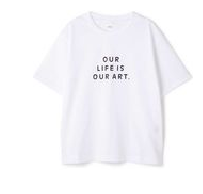

Bottom Rankings : 


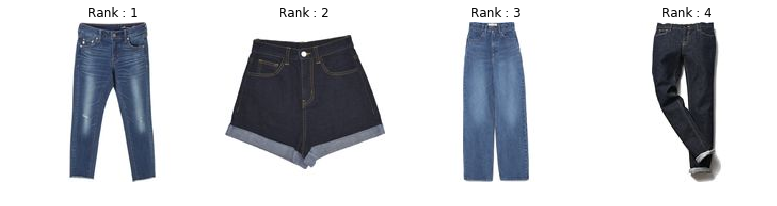

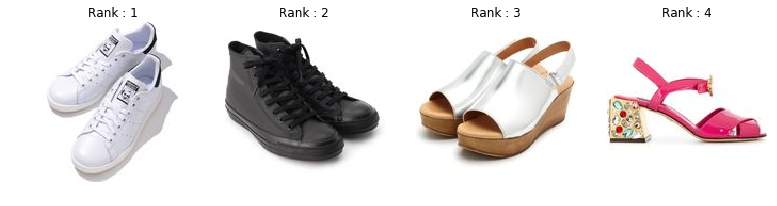

In [558]:
paths=PATH + r'./data/test/'
# plt.axis('off')
fig=plt.figure(figsize=(20,100))
bot=cv2.imread(paths+str(t)+'_m.jpg')
plt.subplot(1,6,1)
plt.imshow(cv2.cvtColor(bot, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print('Bottom Rankings : ')
fig=plt.figure(figsize=(20,100))
for i in range(len(br)):
  bot=cv2.imread(paths+str(br[i])+'_m.jpg')
  plt.subplot(1,6,i+1,title='Rank : '+str(i+1))
  plt.imshow(cv2.cvtColor(bot, cv2.COLOR_BGR2RGB))
  plt.axis('off')
plt.show()

fig=plt.figure(figsize=(20,100))
for i in range(len(sr)):
  bot=cv2.imread(paths+str(sr[i])+'_m.jpg')
  plt.subplot(1,6,i+1,title='Rank : '+str(i+1))
  plt.imshow(cv2.cvtColor(bot, cv2.COLOR_BGR2RGB))
  plt.axis('off')
plt.show()

Making All possible Combination of the IDs

In [559]:
dd=[]
for i in range(len(br)):
  for j in range(len(br)):
    for k in range(len(sr)):
      for l in range(len(sr)):
        dd.append([u,t,br[i],br[j],sr[k],sr[l]])

6

Predicting Output for the 25 Data points

In [560]:
with torch.no_grad():

    s_output=model.forward(dd,visfeat,textfeat)

In [561]:
# b_output=model.paibpr.forward(b_dd,visfeat,textfeat)

In [562]:
s_output.shape

torch.Size([256])

In [563]:
s_out=s_output.cpu().detach().numpy()

In [564]:
# b_out=b_output.cpu().detach().numpy()

Reshaping so as to form bottom vs bottom output values

In [565]:
s_out=s_out.reshape(len(br),len(br),len(sr),len(sr))

In [566]:
# b_out=b_out.reshape(len(br),len(br))

In [567]:
s_out.shape

(16, 16)

In [568]:
import numpy as np
# b_ranks=np.zeros(len(br))
s_ranks=np.zeros(len(sr)*len(br)*len(sr)*len(br))

Applying Mean Reciprocal Rank Algorithm

In [569]:
for i in range(len(br)):
  s=0
  for j in range(len(br)):
    for k in range(len(sr)):
      for l in range(len(sr)):
        if(i!=j and k!=l):
          r=np.argsort(b_out[j,:])[i]
          s+=1/(r+1)
        s_ranks[i]=s

In [570]:
s_finranks = np.argsort(-s_ranks)

In [571]:
# b_finranks

array([3, 2, 0, 1], dtype=int64)

In [572]:
s_finranks

array([ 6,  2, 12, 10,  7, 13, 15, 14,  3,  0,  8,  4,  5,  1, 11,  9],
      dtype=int64)

In [573]:
best_outfit = []
best_outfit.append(t)
best_outfit.append(br[np.where(b_finranks==0)[0][0]])
best_outfit.append(sr[(np.where(s_finranks==0)[0][0])%len(sr)])

In [574]:
np.where(b_finranks==0)[0][0]

2

User's Generated Outfit :  



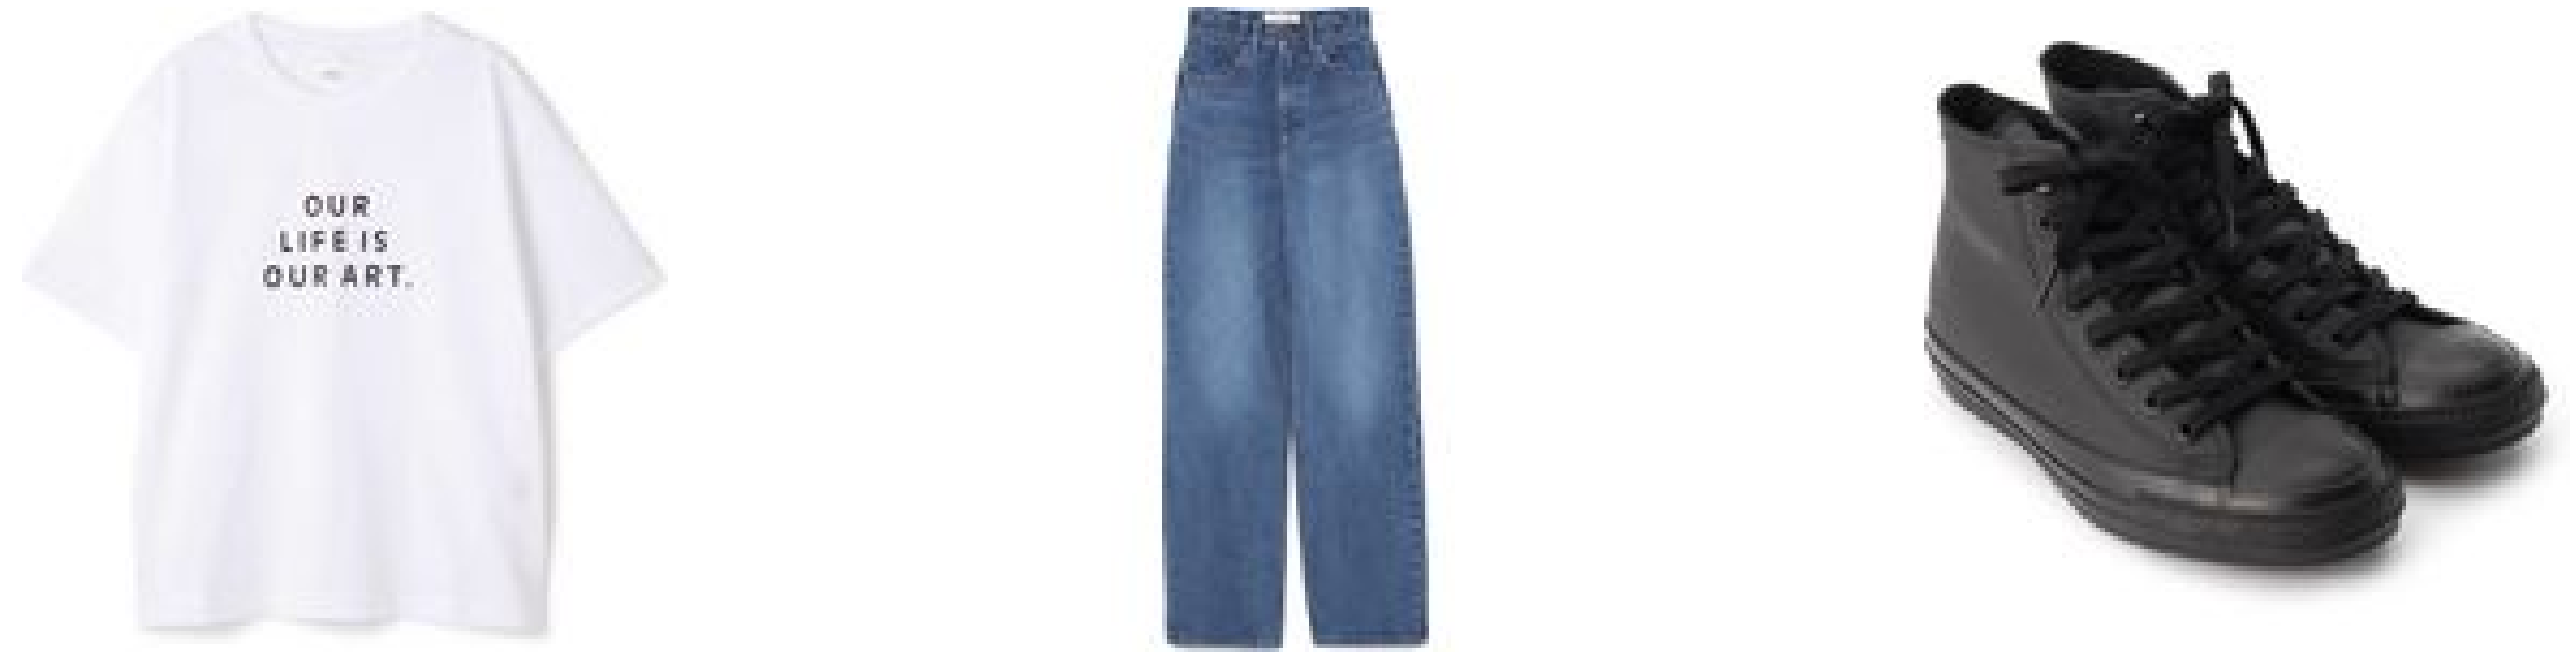

In [575]:
print("User's Generated Outfit : ",'\n')
paths=PATH + r'./data/test/'
fig=plt.figure(figsize=(100,40))
for i in range(len(best_outfit)):
  tmp = cv2.imread(paths+str(best_outfit[i])+'_m.jpg')
  plt.subplot(2,4,i+1)
  plt.imshow(cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB))
  plt.axis('off')
plt.show()

# User's Past Preference

In [576]:
imgpaths = glob.glob(PATH + r'/Group_9/testusers/'+str(u)+'/*/*')

In [577]:
print("User's Past Preference : ",'\n')

fig=plt.figure(figsize=(100,40))
for i in range(len(imgpaths)):
  tmp = cv2.imread(imgpaths[i])
  plt.subplot(2,4,i+1)
  plt.imshow(cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB))
  plt.axis('off')
plt.show()

User's Past Preference :  



<Figure size 7200x2880 with 0 Axes>

# Plotting Fashion Items According to Ranks

In [579]:
ranked_bottoms = []
print('User ID : ',u)
print('Top(Upper) Choice : ')
top=cv2.imread(paths+str(t)+'_m.jpg')
plt.axis('off')
plt.imshow(cv2.cvtColor(top, cv2.COLOR_BGR2RGB))
plt.show()
ranked_bottoms = []
print('Bottom Rankings : ')
fig=plt.figure(figsize=(20,100))
for i in range(len(br)):
  il = np.where(finranks == i)[0][0]
  bid = br[il]
  ranked_bottoms.append(bid)
  bot=cv2.imread(paths+str(bid)+'_m.jpg')
  plt.subplot(1,len(br),i+1,title='Rank : '+str(i+1))
  plt.imshow(cv2.cvtColor(bot, cv2.COLOR_BGR2RGB))
  plt.axis('off')

plt.show()

User ID :  2605600
Top(Upper) Choice : 


error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6uw63ony\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [0]:
with open(PATH + r'/Group_9/src/data/list_attr_cloth.txt','r') as f:
  fil = f.read().split('\n')[2:-1]

In [0]:
attrs = [' '.join(i.split()[0:-1]) for i in fil]

Creating Index to Attribute Name Dict.

In [0]:
attr_ind ={ i : attrs[i] for i in range(len(attrs))}

Loading Attribute Classification Network to give out attributes of the Test Set Above

In [0]:
from keras.models import load_model
from keras import backend as K

In [0]:
with open(PATH + r'/Group_9/src/data/final_model_2040.h5','rb') as f:
  attrmodel = load_model(f)

In [0]:
top_img = cv2.imread(paths+str(t)+'_m.jpg')
bt = br[np.where(finranks == 0)[0][0]]
bl = br[np.where(finranks == len(br)-1)[0][0]]
top_rank_bottom_img = cv2.imread(paths+str(bt)+'_m.jpg')
least_rank_bottom_img = cv2.imread(paths+str(bl)+'_m.jpg')

top = cv2.resize(top_img,(100,100))
bottom_high = cv2.resize(top_rank_bottom_img,(100,100))
bottom_low = cv2.resize(least_rank_bottom_img,(100,100))

In [0]:
top_attr = attrmodel.predict(top.reshape(1,100,100,3))
bot_high_attr = attrmodel.predict(bottom_high.reshape(1,100,100,3))
bot_low_attr = attrmodel.predict(bottom_low.reshape(1,100,100,3))

In [0]:
x= np.argsort(top_attr[0])[-3:]
y= np.argsort(bot_high_attr[0])[-3:]
z= np.argsort(bot_low_attr[0])[-3:]
x=x[::-1]
y=y[::-1]
z=z[::-1]

In [0]:
t_attrs =[]
b_low_attrs =[]
b_high_attrs=[]
for i in x:
  t_attrs.append(attr_ind[i])
for j in y:
  b_high_attrs.append(attr_ind[j])
for k in z:
  b_low_attrs.append(attr_ind[k])

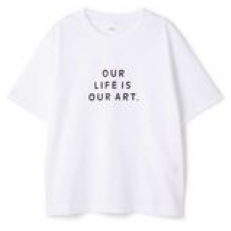

Top Attributes : 
*  maxi  
*  chevron  
*  skater  



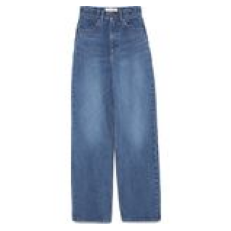

Highest Ranked Bottom Attributes : 
*  bodycon  
*  skater  
*  cut  



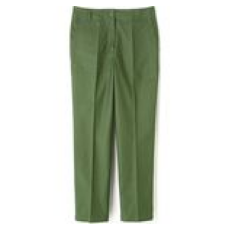

Least Ranked Bottom Attributes : 
*  bodycon  
*  skater  
*  cut  


In [0]:

plt.imshow(cv2.cvtColor(top_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print('Top Attributes : ')
for i in t_attrs:
  print("* ",i," ")
print()

plt.imshow(cv2.cvtColor(top_rank_bottom_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print('Highest Ranked Bottom Attributes : ')
for i in b_high_attrs:
  print("* ",i," ")
print()
plt.imshow(cv2.cvtColor(least_rank_bottom_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print('Least Ranked Bottom Attributes : ')
for i in b_low_attrs:
  print("* ",i," ")

In [0]:
def load_csv_data(train_data_path):
    result = []
    with open(train_data_path,'r') as fp:
        for line in fp:
            t = line.strip().split(',')
            t = [int(i) for i in t]
            result.append(t)
    return result

In [0]:
train = load_csv_data(PATH+r'/Group_9/src/data/train/data/train.csv')

In [0]:
tarr = [i for i in train if i[0]==u] 

In [0]:
tarrout = model.forward(tarr,visfeat,textfeat)
tarrout = tarrout.cpu().detach().numpy()

In [0]:
tarrout.shape

(270,)

In [0]:
mod_output = K.function([attrmodel.layers[-1].input],
                                  [attrmodel.layers[-1].output])

In [0]:
X = []
for i in tarr:
  topvis = visfeat[str(i[1])].cpu().detach().numpy()[:2040]
  botposvis = visfeat[str(i[2])].cpu().detach().numpy()[:2040]
  botnegvis = visfeat[str(i[3])].cpu().detach().numpy()[:2040]
  topatt = mod_output(np.mat(topvis))[0].reshape(1000,)
  botposatt = mod_output(np.mat(botposvis))[0].reshape(1000,)
  botnegatt = mod_output(np.mat(botnegvis))[0].reshape(1000,)
  conc = np.concatenate((topatt,botposatt,botnegatt))
  X.append(conc)


In [0]:
X=np.array(X)
Y = tarrout
X.shape , Y.shape

((270, 3000), (270,))

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [0]:
regr = DecisionTreeRegressor(random_state=0)
regr.fit(X, Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [0]:
at=np.array(attrs)
at[0]

'a-line'

In [0]:
featnames = np.concatenate((at,at,at))

In [0]:
from sklearn.tree import export_graphviz
str_tree=export_graphviz(regr,
                feature_names=featnames,
                filled=True,
                rounded=True,out_file='tree.dot')


In [0]:
#!dot -Tpng tree.dot -o tree.png
!dot -Tsvg tree.dot -o tree.svg

In [0]:
importances = regr.feature_importances_

In [0]:
impinds = np.argsort(-importances)

In [0]:
topinds =[]
botposind = []
botnegind = []
for i in impinds:
  if(i<1000):
    topinds.append(i)
  elif(i<2000):
    botposind.append(i-1000)
  else:
    botnegind.append(i-2000)

In [0]:
print("Top's top 10 important attributes for the user" )
for i in topinds[:10]:
  print("* ",attr_ind[i])

print("Bottom's top 10 important attributes for the user" )
for i in botposind[:10]:
  print("* ",attr_ind[i])


Top's top 10 important attributes for the user
*  edge
*  monroe
*  wave
*  cap-sleeve
*  mesh
*  crew neck
*  dreamcatcher
*  babydoll
*  wash
*  classic fit
Bottom's top 10 important attributes for the user
*  chino
*  crop
*  knit pencil
*  sheer-paneled
*  knit trapeze
*  west
*  button-front
*  abstract paisley
*  medium
*  backless


In [0]:
import cv2
tree = cv2.imread('tree.png')

In [0]:
fig = plt.figure(figsize=(40,80))
plt.imshow(tree[:1000,21500:-2000])

TypeError: ignored

<Figure size 2880x5760 with 0 Axes>

# **Correlation Analysis**

In [0]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns

In [0]:
X_top = []
X_posbottom = []
X_negbottom = []
for i in tarr:
  topvis = visfeat[str(i[1])].cpu().detach().numpy()[:2040]
  botposvis = visfeat[str(i[2])].cpu().detach().numpy()[:2040]
  botnegvis = visfeat[str(i[3])].cpu().detach().numpy()[:2040]
  topatt = mod_output(np.mat(topvis))[0].reshape(1000,)
  botposatt = mod_output(np.mat(botposvis))[0].reshape(1000,)
  botnegatt = mod_output(np.mat(botnegvis))[0].reshape(1000,)
  X_top.append(topatt)
  X_posbottom.append(botposatt)
  X_negbottom.append(botnegatt)

* Top and Bottom attributes

In [0]:
top_img = cv2.imread(paths+str(t)+'_m.jpg')
top = cv2.resize(top_img,(100,100))
top_attr = attrmodel.predict(top.reshape(1,100,100,3))
top_attr = np.argsort(-top_attr[0])[:10][::-1]

num_attrs = 5 #number of attributes per bottom
bot_attr_dict = {}
for b in ranked_bottoms:
  #if b == np.where
  bot_img = cv2.imread(paths+str(b)+'_m.jpg')
  bot_img = cv2.resize(bot_img,(100,100))
  bot_attr = attrmodel.predict(bot_img.reshape(1,100,100,3))
  bot_attr = np.argsort(bot_attr[0])[-num_attrs:][::-1]
  bot_attr_dict[b] = (list(bot_attr))

bot_attrs = sum(list(bot_attr_dict.values()), [])
bot_attrs = np.array(list(set(bot_attrs)))

In [0]:
len(bot_attrs)

15

In [0]:
# tops_attrs = np.array(topinds[:20])
# posbottom_attrs = np.array(botposind[:20])

In [0]:
X_top=np.array(X_top)[:, top_attr]
X_posbottom = np.array(X_posbottom)[:, bot_attrs]
# X_posbottom = np.array(X_posbottom)[:, posbottom_attrs]
# X_negbottom = np.array(X_negbottom)
Y = tarrout
X_top.shape , X_posbottom.shape, Y.shape

((270, 10), (270, 15), (270,))

In [0]:
# for i in range(X_posbottom.shape[0]):
#   X_posbottom[i] *= Y[i]

In [0]:
corr_df = pd.DataFrame(index = top_attr, columns= bot_attrs)
i = 0
j = 0
for ta in top_attr:
  for ba in bot_attrs:
    corr_df.loc[ta][ba] = pearsonr(X_top[:, i], X_posbottom[:, j])[0]
    j +=1
  i+=1
  j = 0
corr_df = corr_df.fillna(0)

In [0]:
Y.shape

(270,)

In [0]:
drop_top = [837, 596, 884, 722]
drop_bottom = [836, 837]
corr_df=corr_df.drop(drop_bottom, axis = 1)
corr_df=corr_df.drop(drop_top)

In [0]:
import matplotlib
import plotly.graph_objects as go
from matplotlib import cm
pink_cmap = cm.get_cmap('RdPu')

pink_rgb = []
norm = matplotlib.colors.Normalize(vmin=0, vmax=255)
for i in range(0, 255):
       k = matplotlib.colors.colorConverter.to_rgb(pink_cmap(norm(i)))
       pink_rgb.append(k)

def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = map(np.uint8, np.array(cmap(k*h)[:3])*255)
        C = list(C)
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

pink = matplotlib_to_plotly(pink_cmap, 255)

In [0]:
import plotly.graph_objects as go
from matplotlib import cm
pink_cmap = cm.get_cmap('RdPu')

fig = go.Figure(data=go.Heatmap(
                   z=corr_df,
                   x=[attr_ind[i] for i in bot_attrs if i not in drop_bottom],
                   y=[attr_ind[i] for i in top_attr if i not in drop_top], colorscale = pink))
fig.show()

In [0]:
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [0]:
fig.write_image('confmatrix.pdf')

In [0]:
for bid in bot_attr_dict:
  bot_attr_dict[bid] = [attr_ind[aid] for aid in bot_attr_dict[bid]]

In [0]:
attr_ind[837]

'sleeveless'

In [0]:
ranked_bottoms

[37707544, 4548124, 37700512, 38582331, 19654074, 41448671]

In [0]:
bot_attr_dict

{4548124: ['bodycon', 'maxi', 'shift', 'zippered', 'eyelet fit'],
 19654074: ['chevron', 'maxi', 'polka dot', 'skater', 'faux'],
 37700512: ['midi', 'maxi', 'shift', 'bodycon', 'sleeveless'],
 37707544: ['bodycon', 'skater', 'cut', 'sleeveless', 'print'],
 38582331: ['maxi', 'shift', 'striped', 'sleeve', 'skater'],
 41448671: ['bodycon', 'skater', 'cut', 'sleeveless', 'maxi']}

In [0]:
corr_df = corr_df.drop([836, 837, 660, 139], axis = 1)

KeyError: ignored

In [0]:
corr_df

,836,837,999,616,329,139,236,335,81,722,596,820,884,730,830
730,-0.182214,0.090775,-0.181586,-0.171129,-0.047644,-0.093811,-0.141532,0.004173,-0.151969,-0.095933,-0.193293,-0.130396,0.051172,-0.055838,-0.059552
837,0.108646,-0.018052,0.074813,-0.000558,-0.031811,0.046590,0.075486,0.123151,0.039587,0.118367,-0.001602,0.004347,-0.029507,0.051243,0.041682
944,-0.148728,0.104298,-0.126353,-0.140739,-0.058465,-0.054970,-0.084732,-0.001034,-0.119428,-0.067746,-0.159834,-0.095602,0.034843,-0.049110,-0.017176
836,-0.027889,0.125242,-0.000850,0.000299,-0.033654,-0.018340,-0.018107,0.061337,-0.084978,-0.082574,-0.079087,-0.094308,0.067349,-0.054695,-0.080542
722,-0.142340,0.057080,-0.170726,-0.136182,0.011960,-0.115959,-0.135278,-0.038377,-0.120794,-0.114219,-0.155486,-0.086417,0.027219,-0.080604,-0.037129
884,-0.099167,0.096096,-0.072580,-0.074379,-0.081128,-0.061178,-0.056699,0.033906,-0.097668,-0.046071,-0.154202,-0.077067,0.014600,-0.046140,-0.028377
820,0.059362,-0.057113,0.022589,0.055670,0.103438,0.003014,0.027657,-0.022650,0.063108,0.022002,0.076782,0.092167,0.019324,-0.019152,0.026523
830,-0.070330,-0.015532,-0.064763,0.012772,0.049047,-0.114147,-0.054046,-0.084081,0.004120,-0.103863,-0.014720,0.051696,-0.038611,-0.081719,-0.011006
139,-0.165111,0.097487,-0.172130,-0.156671,-0.040075,-0.101185,-0.126588,-0.002193,-0.150432,-0.106269,-0.201231,-0.112561,0.031222,-0.076886,-0.030489
596,-0.051094,0.076673,-0.043840,-0.082173,-0.019326,-0.008444,-0.030093,0.054074,-0.083864,-0.020458,-0.085709,-0.064225,0.047028,-0.033906,-0.002879


In [0]:
corr_scores = {}
for b in bot_attr_dict:
  attr = bot_attr_dict[b]
  sum_corr = 0
  for ta in top_attr:
    for ba in attr:
      sum_corr += corr_df.loc[ta][ba]
  corr_scores[b] = sum_corr

In [0]:
sorted(corr_scores, key = corr_scores.get, reverse=True)

[37707544, 41448671, 19654074, 38582331, 37700512, 4548124]

In [0]:
ranked_bottoms

[37707544, 4548124, 37700512, 38582331, 19654074, 41448671]

In [0]:
bottom_cumulative_sum = corr_df.sum()

In [0]:
bottom_corr_dict = {}
for ind in bottom_cumulative_sum.index:
  bottom_corr_dict[ind] = bottom_cumulative_sum.loc[ind]
sorted(bottom_corr_dict, key = bottom_corr_dict.get, reverse=True)

[837, 884, 335, 329, 830, 730, 722, 820, 139, 236, 616, 81, 836, 999, 596]

KeyboardInterrupt: ignored

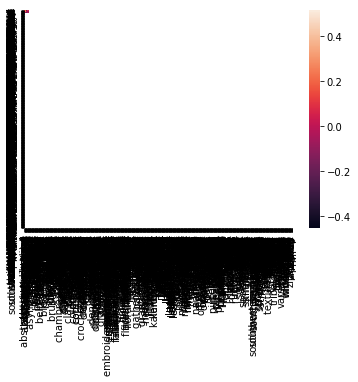

In [0]:
sns.heatmap(corr_df, xticklabels = list(attr_ind.values()), yticklabels = list(attr_ind.values()))